In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [15]:
iddaa = pd.read_excel("/Users/aytackolukisa/Desktop/Jupiter_Dosyaları/iddaa/Geniş İdda.xlsx")

In [16]:
liste_z =["IY", 'MS']
for i in liste_z:
    for x in range(len(iddaa)):
        if iddaa[i][x] == "ERT" or iddaa[i][x] == "ERT."  :
            iddaa[i][x] = np.nan

            
df = iddaa.copy()

In [17]:
nn = df["IY"].str.split("-", n = 1, expand = True)
df["İY_EvSahibiTK_Gol"] = nn[0]
df["İY_DeplasmanTK_Gol"] = nn[1]
df.drop(columns = ["IY"],inplace = True, axis = 1)

nn2 = df["MS"].str.split("-", n = 1, expand = True)
df["MS_EvSahibiTK_Gol"] = nn2[0]
df["MS_DeplasmanTK_Gol"] = nn2[1]
df.drop(columns = ["MS"],inplace = True, axis = 1)


In [18]:
df.columns
liste_c =['IY_1', 'IY_X', 'IY_2', 'MS_1',
       'MS_X', 'MS_2', 'K_GOL_Var', 'K_GOL_Yok', '1/X', '1/2', 'X/2',
       'IY 1,5 Gol_A', 'IY 1,5 Gol_U', 'MS_1.5_A', 'MS_1.5_U', 'MS_2.5_A',
       'MS_2.5_U', 'MS_3.5_A', 'MS_3.5_U', 'TP_GOL_0_1', 'TP_GOL_2_3',
       'TP_GOL_4_6', 'TP_GOL_7_Ü', 'İY_EvSahibiTK_Gol', 'İY_DeplasmanTK_Gol',
       'MS_EvSahibiTK_Gol', 'MS_DeplasmanTK_Gol']

for i in liste_c:
    df[i] = df[i].str.replace(",", ".")

In [19]:
for x in range(len(df)):
    for i in liste_c:
        if df[i][x] == "-" :
            df[i][x] = np.nan

for x in liste_c:
    print("{} sütün içindeki problemli değerler : ".format(x)) # Hatalı ifadenin sütünunu yazıyoruz
    print("------")
    for i in df[x] :
        try :
            float(i) # Tüm değerleri float a çevir çeviremediğin veriyi yaz
        except:
            print(i)

IY_1 sütün içindeki problemli değerler : 
------
IY_X sütün içindeki problemli değerler : 
------
IY_2 sütün içindeki problemli değerler : 
------
MS_1 sütün içindeki problemli değerler : 
------
MS_X sütün içindeki problemli değerler : 
------
MS_2 sütün içindeki problemli değerler : 
------
K_GOL_Var sütün içindeki problemli değerler : 
------
K_GOL_Yok sütün içindeki problemli değerler : 
------
1/X sütün içindeki problemli değerler : 
------
1/2 sütün içindeki problemli değerler : 
------
X/2 sütün içindeki problemli değerler : 
------
IY 1,5 Gol_A sütün içindeki problemli değerler : 
------
IY 1,5 Gol_U sütün içindeki problemli değerler : 
------
MS_1.5_A sütün içindeki problemli değerler : 
------
MS_1.5_U sütün içindeki problemli değerler : 
------
MS_2.5_A sütün içindeki problemli değerler : 
------
MS_2.5_U sütün içindeki problemli değerler : 
------
MS_3.5_A sütün içindeki problemli değerler : 
------
MS_3.5_U sütün içindeki problemli değerler : 
------
TP_GOL_0_1 sütün içind

In [40]:
winsorize_list =["w_"+liste_c[i] for i in range(len(liste_c))] 
from scipy.stats.mstats import winsorize

for i in range(len(winsorize_list)):
    df[ winsorize_list[i]] = winsorize(df[liste_c[i]],(0.0,0.05))

In [41]:
df["İY_TOP_GOL"]=np.nan
df["MS_TOP_GOL"]=np.nan
df[["İY_EvSahibiTK_Gol","İY_DeplasmanTK_Gol","MS_EvSahibiTK_Gol","MS_DeplasmanTK_Gol"]] = df[["İY_EvSahibiTK_Gol","İY_DeplasmanTK_Gol","MS_EvSahibiTK_Gol","MS_DeplasmanTK_Gol"]].apply(pd.to_numeric)

df["İY_TOP_GOL"] = df["İY_EvSahibiTK_Gol"] + df["İY_DeplasmanTK_Gol"]
df["MS_TOP_GOL"] = df["MS_EvSahibiTK_Gol"] + df["MS_DeplasmanTK_Gol"]

In [42]:
df['Class2'] = df['MS_TOP_GOL'].apply(lambda x: '1' if x > 2 else '0')

df['Class1'] = df['İY_TOP_GOL'].apply(lambda x: '1' if x > 2 else '0')

In [43]:
liste_d = ['Class2','Class1','IY_1', 'IY_X', 'IY_2', 'MS_1',
       'MS_X', 'MS_2', 'K_GOL_Var', 'K_GOL_Yok', '1/X', '1/2', 'X/2',
       'IY 1,5 Gol_A', 'IY 1,5 Gol_U', 'MS_1.5_A', 'MS_1.5_U', 'MS_2.5_A',
       'MS_2.5_U', 'MS_3.5_A', 'MS_3.5_U', 'TP_GOL_0_1', 'TP_GOL_2_3',
       'TP_GOL_4_6', 'TP_GOL_7_Ü', 'İY_EvSahibiTK_Gol', 'İY_DeplasmanTK_Gol',
       'MS_EvSahibiTK_Gol', 'MS_DeplasmanTK_Gol']
for i in liste_d:
    df[[i]] = df[[i]].apply(pd.to_numeric)

In [44]:

data =df.copy()

In [45]:

data["MS_X"].fillna(data["MS_2.5_A"], inplace = True)
df["K_GOL_Yok"].fillna(df["MS_2.5_A"], inplace = True)

df["IY 1,5 Gol_A"].fillna(df["MS_2.5_A"], inplace = True)
df["MS_1.5_A"].fillna(df["MS_2.5_A"], inplace = True)
df["IY 1,5 Gol_U"].fillna((-1*(df["MS_2.5_A"])+5), inplace = True)

df["MS_2.5_A"].fillna(df["MS_2.5_A"], inplace = True)
df["MS_2"].fillna(df["X/2"], inplace = True)
df["MS_1"].fillna(df["1/X"], inplace = True)

df["MS_3.5_A"].fillna(df["MS_2.5_A"], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 0 to 491
Data columns (total 62 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Saat                  385 non-null    object 
 1   Lig                   385 non-null    object 
 2   Ev Sahibi             385 non-null    object 
 3   Misafir               385 non-null    object 
 4   IY_1                  385 non-null    float64
 5   IY_X                  385 non-null    float64
 6   IY_2                  385 non-null    float64
 7   MS_1                  385 non-null    float64
 8   MS_X                  385 non-null    float64
 9   MS_2                  385 non-null    float64
 10  K_GOL_Var             385 non-null    float64
 11  K_GOL_Yok             385 non-null    float64
 12  1/X                   385 non-null    float64
 13  1/2                   385 non-null    float64
 14  X/2                   385 non-null    float64
 15  IY 1,5 Gol_A          3

In [46]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 0 to 491
Data columns (total 62 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Saat                  385 non-null    object 
 1   Lig                   385 non-null    object 
 2   Ev Sahibi             385 non-null    object 
 3   Misafir               385 non-null    object 
 4   IY_1                  385 non-null    float64
 5   IY_X                  385 non-null    float64
 6   IY_2                  385 non-null    float64
 7   MS_1                  385 non-null    float64
 8   MS_X                  385 non-null    float64
 9   MS_2                  385 non-null    float64
 10  K_GOL_Var             385 non-null    float64
 11  K_GOL_Yok             385 non-null    float64
 12  1/X                   385 non-null    float64
 13  1/2                   385 non-null    float64
 14  X/2                   385 non-null    float64
 15  IY 1,5 Gol_A          3

In [47]:
numeric = df.loc[:, df.dtypes != np.object]
numeric.columns

Index(['IY_1', 'IY_X', 'IY_2', 'MS_1', 'MS_X', 'MS_2', 'K_GOL_Var',
       'K_GOL_Yok', '1/X', '1/2', 'X/2', 'IY 1,5 Gol_A', 'IY 1,5 Gol_U',
       'MS_1.5_A', 'MS_1.5_U', 'MS_2.5_A', 'MS_2.5_U', 'MS_3.5_A', 'MS_3.5_U',
       'TP_GOL_0_1', 'TP_GOL_2_3', 'TP_GOL_4_6', 'TP_GOL_7_Ü',
       'İY_EvSahibiTK_Gol', 'İY_DeplasmanTK_Gol', 'MS_EvSahibiTK_Gol',
       'MS_DeplasmanTK_Gol', 'İY_TOP_GOL', 'MS_TOP_GOL', 'Class2', 'Class1',
       'w_IY_1', 'w_IY_X', 'w_IY_2', 'w_MS_1', 'w_MS_X', 'w_MS_2',
       'w_K_GOL_Var', 'w_K_GOL_Yok', 'w_1/X', 'w_1/2', 'w_X/2',
       'w_IY 1,5 Gol_A', 'w_IY 1,5 Gol_U', 'w_MS_1.5_A', 'w_MS_1.5_U',
       'w_MS_2.5_A', 'w_MS_2.5_U', 'w_MS_3.5_A', 'w_MS_3.5_U', 'w_TP_GOL_0_1',
       'w_TP_GOL_2_3', 'w_TP_GOL_4_6', 'w_TP_GOL_7_Ü', 'w_İY_EvSahibiTK_Gol',
       'w_İY_DeplasmanTK_Gol', 'w_MS_EvSahibiTK_Gol', 'w_MS_DeplasmanTK_Gol'],
      dtype='object')

In [48]:
numeric["fark"] = numeric["MS_2.5_U"]-numeric["MS_2.5_A"]
numeric[["fark"]]
numeric["fark2"] = numeric["MS_1.5_A"]-numeric["MS_1.5_U"]
numeric[["fark2"]]
numeric["Carpım1"] = numeric["MS_2.5_A"]*numeric["TP_GOL_0_1"]
numeric[["Carpım1"]]
numeric["Carpım2"] = numeric["MS_2.5_U"]*numeric["TP_GOL_2_3"]
numeric[["Carpım2"]]

<ipython-input-48-644c66f92be4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric["fark"] = numeric["MS_2.5_U"]-numeric["MS_2.5_A"]
<ipython-input-48-644c66f92be4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric["fark2"] = numeric["MS_1.5_A"]-numeric["MS_1.5_U"]
<ipython-input-48-644c66f92be4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

,Carpım2
0,3.3000
1,2.7225
3,2.9700
4,2.6720
5,2.4000
...,...
486,2.5920
488,2.7125
489,2.6400
490,2.7200


In [49]:
extra = numeric[["TP_GOL_0_1","TP_GOL_2_3","TP_GOL_4_6","w_K_GOL_Var","w_K_GOL_Yok","w_MS_2.5_U","w_TP_GOL_0_1","w_TP_GOL_2_3","w_TP_GOL_4_6",
                 "w_TP_GOL_7_Ü",'Class2','Class1',"fark","fark2","Carpım1","Carpım2"]]

In [50]:
def model_olustur(X, y):
    X_eğitim, X_test, y_eğitim, y_test =  train_test_split(X, y, test_size=0.20, random_state=111, stratify = y)
    logreg_model = LogisticRegression()
    logreg_model.fit(X_eğitim, y_eğitim)

    tahmin_eğitim = logreg_model.predict(X_eğitim)
    tahmin_test = logreg_model.predict(X_test)
    hata_matrisi_eğitim = confusion_matrix(y_eğitim, tahmin_eğitim)
    hata_matrisi_test = confusion_matrix(y_test, tahmin_test)
    print("Modelin doğruluk değeri : ",  logreg_model.score(X_test, y_test))
    print("Eğitim veri kümesi")
    print(classification_report(y_eğitim,tahmin_eğitim) )
    print("Test veri kümesi")
    print(classification_report(y_test,tahmin_test) )
    return  None

In [101]:
from imblearn.over_sampling import SMOTE

y = extra.Class2
X = extra.drop(["Class2","Class1"], axis=1)

sm = SMOTE(random_state=27)
X_smote, y_smote = sm.fit_resample(X, y)
model_olustur(X_smote, y_smote)

Modelin doğruluk değeri :  0.5851063829787234
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       0.59      0.52      0.55       186
           1       0.57      0.63      0.60       186

    accuracy                           0.58       372
   macro avg       0.58      0.58      0.58       372
weighted avg       0.58      0.58      0.58       372

Test veri kümesi
              precision    recall  f1-score   support

           0       0.60      0.53      0.56        47
           1       0.58      0.64      0.61        47

    accuracy                           0.59        94
   macro avg       0.59      0.59      0.58        94
weighted avg       0.59      0.59      0.58        94



# KNN REGRETION

In [102]:
from sklearn.neighbors import KNeighborsClassifier
komsular = KNeighborsClassifier(n_neighbors=5, weights='distance')

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_olcekli = ss.fit_transform(X_smote)

In [103]:
X_train_olcekli, X_test_olcekli, y_train, y_test = train_test_split(X_olcekli, y_smote, test_size=0.2, random_state = 40)

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_olcekli,y_train)
knn.score(X_test_olcekli, y_test)

0.6276595744680851

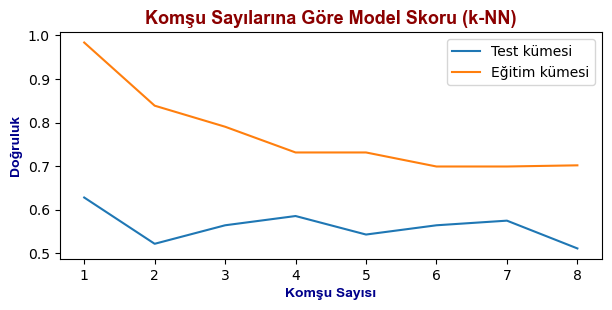

In [104]:
komsu_sayisi = np.arange(1, 9)
egitim_kumesi_skoru = np.empty(len(komsu_sayisi))
test_kumesi_skoru = np.empty(len(komsu_sayisi))

for i, k in enumerate(komsu_sayisi):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_olcekli, y_train)
    egitim_kumesi_skoru[i] = knn.score(X_train_olcekli, y_train)

    #Compute accuracy on the testing set
    test_kumesi_skoru[i] = knn.score(X_test_olcekli, y_test)

    
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(7,3), dpi = 100)
plt.plot(komsu_sayisi, test_kumesi_skoru, label = 'Test kümesi')
plt.plot(komsu_sayisi, egitim_kumesi_skoru, label = 'Eğitim kümesi')
plt.legend()
plt.title('Komşu Sayılarına Göre Model Skoru (k-NN)', fontdict= baslik_font)
plt.xlabel('Komşu Sayısı', fontdict= eksen_font)
plt.ylabel('Doğruluk', fontdict= eksen_font)
plt.show()

 # KARAR AGACI

In [105]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

X_eğitim, X_test, y_eğitim, y_test =  train_test_split(X_smote, y_smote, test_size=0.20, random_state=111)

iddia_karar_agaci = DecisionTreeClassifier(criterion='entropy', max_features=1,
                                     max_depth=4,random_state = 100)
iddia_karar_agaci.fit(X_eğitim, y_eğitim)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=1,
                       random_state=100)

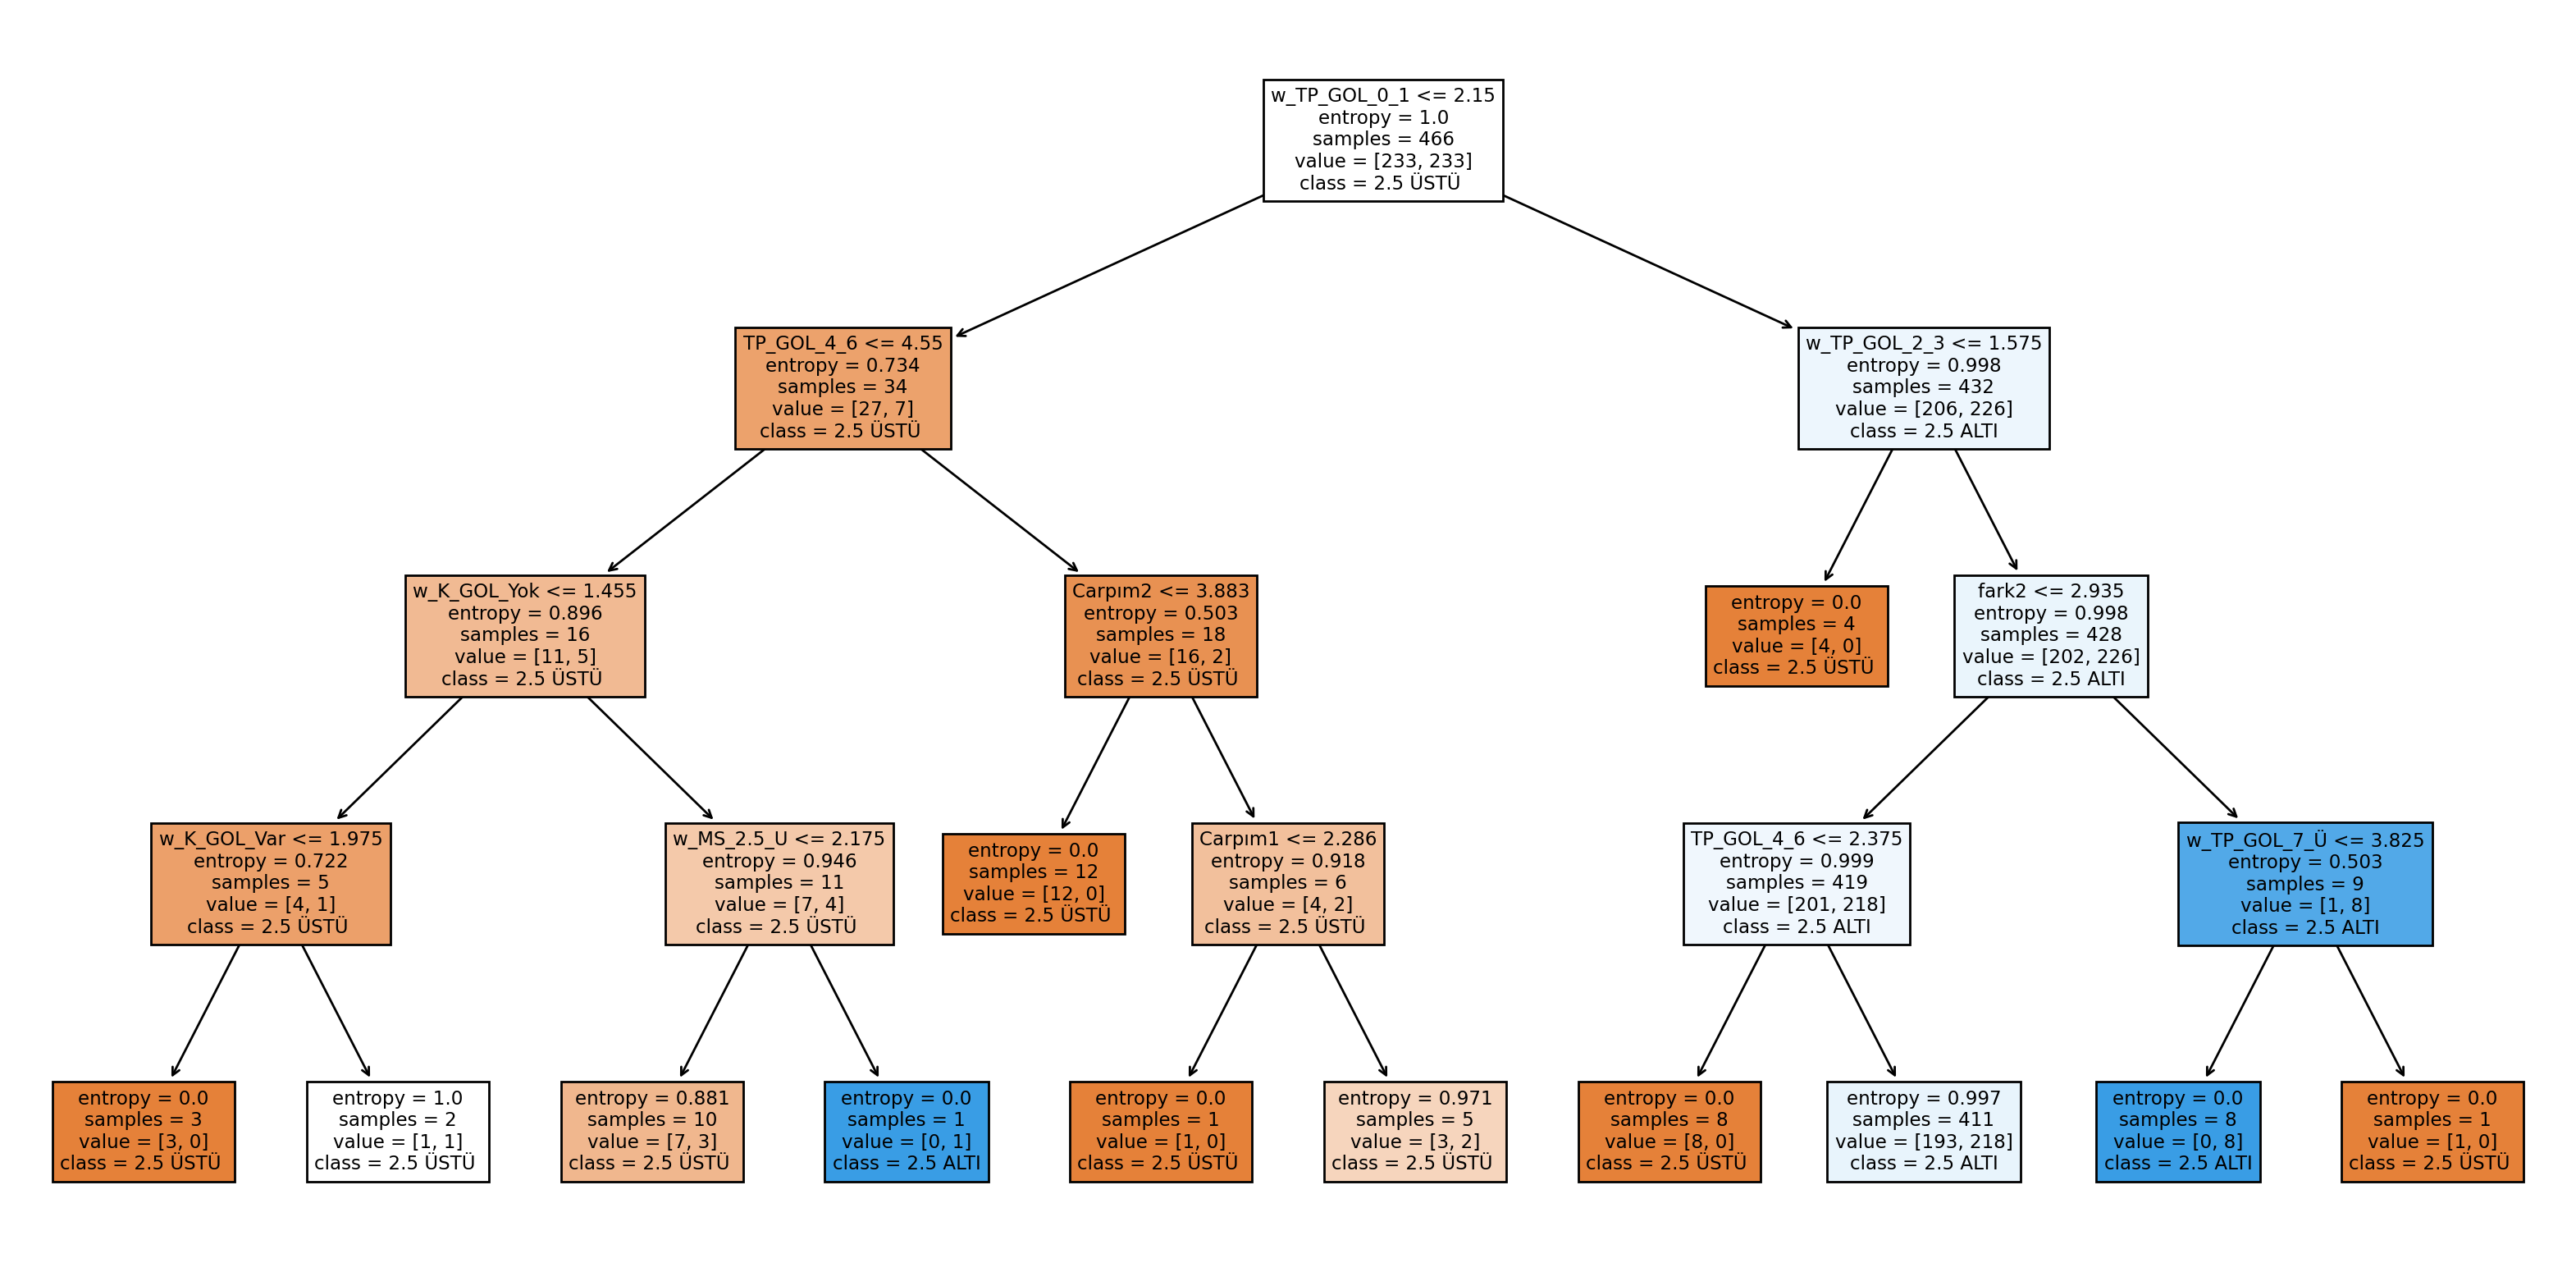

In [106]:
karar_agaci = DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)

X = X_smote
y = y_smote

karar_agaci.fit(X, y)

from sklearn import tree
plt.figure(figsize=(20, 10), dpi=200)
tree.plot_tree(decision_tree = karar_agaci,
               feature_names=X.columns,
               class_names=['2.5 ÜSTÜ ', '2.5 ALTI'],
               filled = True
              )
plt.show()

In [107]:
from sklearn.metrics import accuracy_score
y_tahmin_ka = iddia_karar_agaci.predict(X_test)


print("Karar Ağacı Doğruluk Değeri        : {:.2f}".format(accuracy_score(y_test, y_tahmin_ka)))

Karar Ağacı Doğruluk Değeri        : 0.55


Hala başarıda lojistik regresyonun üzerine çıkan yok. 

# RASGELE ORMAN

In [108]:
from sklearn.ensemble import RandomForestClassifier
rastgele_orman = RandomForestClassifier(n_estimators=25, random_state=2)
rastgele_orman.fit(X_eğitim, y_eğitim) 

RandomForestClassifier(n_estimators=25, random_state=2)

In [109]:
from sklearn.metrics import accuracy_score
y_tahmin_ro = rastgele_orman.predict(X_test)
print("Rastgele Orman Doğruluk Değeri : {:.2f}".format(accuracy_score(y_test, y_tahmin_ro)))

Rastgele Orman Doğruluk Değeri : 0.57


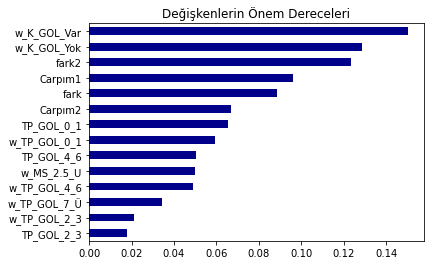

In [110]:
önem_dereceleri = pd.Series(data=rastgele_orman.feature_importances_,
                        index= X_eğitim.columns)

önem_dereceleri_sıralı = önem_dereceleri.sort_values()

önem_dereceleri_sıralı.plot(kind='barh', color='darkblue')
plt.title('Değişkenlerin Önem Dereceleri')
plt.show()